In [1]:
from dreye.estimators.dependent_excitation_models import DependentExcitationFit

In [2]:
import dreye
import numpy as np

In [3]:
pr_model = dreye.create_photoreceptor_model(
    [350, 400, 560], 
)

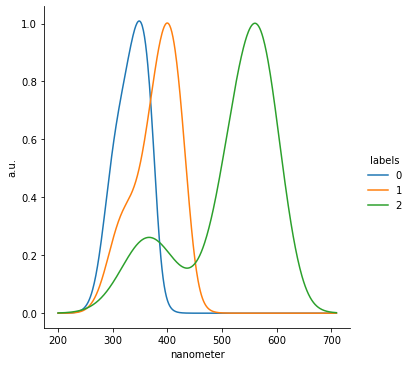

In [4]:
pr_model.sensitivity.plot()

In [5]:
measured_spectra = dreye.create_measured_spectra_container(
    [340, 370, 400, 450, 500, 550, 615]
)

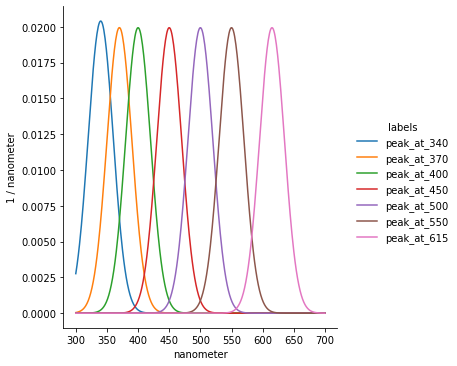

In [6]:
measured_spectra.normalized_spectra.plot()

In [7]:
model = DependentExcitationFit(
    photoreceptor_model=pr_model, 
    measured_spectra=measured_spectra,
    seed=1, 
    independent_layers=3, 
    bit_depth=24
)

In [8]:
model.fit(np.random.random((10, 3)))

DependentExcitationFit(bit_depth=24, independent_layers=3,
                       measured_spectra=MeasuredSpectraContainer([[0.0 0.0920818907631377 0.1841637815262754 0.2762456722894131] [0.0 0.10163909943989607 0.20327819887979215 0.3049172983196882] [0.0 0.1119081335011885 0.223816267002377 0.33572440050356545] ... [0.0 1.8055757729834933e-70 3.611151545966987e-70 5.4167273189504794e-7...502914508322606e-54 8.700582901664521e-54 1.3050874352496782e-53] ... [0.0 0.00012104451606887969 0.00024208903213775938  0.00036313354820663907] [0.0 9.823950044443404e-05 0.00019647900088886808 0.0002947185013333021] [0.0 7.953191433911009e-05 0.00015906382867822018 0.00023859574301733025]] microspectral_E_Q),
                       photoreceptor_model=LinearPhotoreceptor(0, 1, 2),
                       seed=1)

In [9]:
model.score()

0.13331830248148477

In [10]:
np.round(model.excite_X_, 2)

array([[0.96, 0.31, 0.83],
       [0.32, 0.68, 0.68],
       [0.89, 0.23, 0.04],
       [0.24, 0.78, 0.06],
       [0.96, 0.8 , 0.12],
       [0.24, 0.78, 0.9 ],
       [0.9 , 0.5 , 0.53],
       [0.4 , 0.01, 0.17],
       [0.77, 0.97, 0.95],
       [0.36, 0.29, 0.21]])

In [11]:
np.round(model.fitted_excite_X_, 2)

array([[0.85, 0.73, 0.58],
       [0.19, 0.18, 0.22],
       [0.44, 0.37, 0.25],
       [0.6 , 0.52, 0.46],
       [0.87, 0.73, 0.49],
       [0.58, 0.52, 0.51],
       [0.45, 0.37, 0.22],
       [0.45, 0.45, 0.57],
       [0.89, 0.81, 0.79],
       [0.46, 0.37, 0.19]])

In [12]:
model.layer_intensities_

array([[1.12839415e-32, 8.36996991e-01, 3.17112939e-01],
       [3.26069046e-29, 3.92768317e-01, 3.35797680e-06],
       [1.10412225e-26, 1.29653103e-01, 8.22801635e-02],
       [2.77124562e-01, 1.81878509e-03, 1.56640235e-14],
       [6.27821147e-01, 2.16200904e-01, 9.74728541e-18],
       [9.85306312e-07, 1.62301096e-02, 4.44899645e-19],
       [2.59746035e-06, 6.88759817e-02, 1.90365688e-17]])

In [13]:
model.pixel_strength_

array([[0.45833333, 0.83333333, 0.08333333],
       [0.33333333, 0.16666667, 0.08333333],
       [0.16666667, 0.33333333, 0.375     ],
       [0.54166667, 0.41666667, 0.625     ],
       [0.20833333, 0.875     , 0.        ],
       [0.66666667, 0.41666667, 0.58333333],
       [0.125     , 0.20833333, 0.83333333],
       [1.        , 0.25      , 0.70833333],
       [0.95833333, 0.875     , 0.08333333],
       [0.04166667, 0.20833333, 0.875     ]])

In [12]:
import cvxpy as cp
import numpy as np
# Generate a random problem
np.random.seed(0)
m, n, o = 6, 100, 3  # n_leds, n_pixel, n_layers
bits = 7

x_true = np.random.randint(bits, size=(o, n))

A = np.random.rand(m, o)  # n_leds, n_layers
# b = np.random.randn(m)
b = A @ x_true  # n_leds, n_pixel
# Construct a CVXPY problem
x = cp.Variable((o, n), integer=True)
constraints = [x >= 0, x <= bits-1]
#constraints = []
objective = cp.Minimize(cp.sum_squares(A @ x - b))
prob = cp.Problem(objective, constraints)
result = prob.solve(
    # verbose=True
    solver='ECOS_BB'
)

print(result)
print("Status: ", prob.status)
print("The optimal value is", prob.value)
print("A solution x is")
print(x.value)

4.176077688695805e-08
Status:  optimal
The optimal value is 4.176077688695805e-08
A solution x is
[[ 3.99999764e+00  5.00000000e+00  2.48421720e-05  3.00000000e+00
   2.99998636e+00  3.00000000e+00  1.00000236e+00  3.00000000e+00
   5.00000000e+00  1.99998639e+00  4.00000000e+00  5.99998873e+00
   1.12776130e-05  2.49238130e-05  4.00000000e+00  2.00000000e+00
   1.00000000e+00  5.99997917e+00  5.99997508e+00  2.48786357e-05
   1.00000000e+00  5.00000000e+00  1.00000000e+00  4.99998638e+00
   2.48488513e-05  1.00000000e+00  3.99998185e+00  3.00000000e+00
   2.49039006e-05  3.00000237e+00  5.00000000e+00  5.99997511e+00
   2.48950771e-05  2.00000000e+00  2.99999764e+00  2.08144871e-05
   9.99997635e-01  3.00002291e+00  5.00000000e+00  3.00000000e+00
   2.99999764e+00  5.99998873e+00  1.12761868e-05  1.00000000e+00
   1.00000000e+00  1.00000000e+00  2.48831179e-05  2.00001363e+00
   4.00000000e+00  3.00000000e+00  5.99998873e+00  3.00000000e+00
   1.99999764e+00  4.00002293e+00  2.0000000

In [13]:
np.round(x.value, 0)

array([[ 4.,  5.,  0.,  3.,  3.,  3.,  1.,  3.,  5.,  2.,  4.,  6.,  0.,
         0.,  4.,  2.,  1.,  6.,  6.,  0.,  1.,  5.,  1.,  5.,  0.,  1.,
         4.,  3.,  0.,  3.,  5.,  6.,  0.,  2.,  3.,  0.,  1.,  3.,  5.,
         3.,  3.,  6.,  0.,  1.,  1.,  1.,  0.,  2.,  4.,  3.,  6.,  3.,
         2.,  4.,  2.,  0.,  0.,  4.,  5.,  5.,  6.,  0.,  4.,  1.,  4.,
         1.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  3.,  6.,  3.,  6.,  2.,
         3.,  0.,  6.,  3.,  5.,  4.,  1.,  2.,  4.,  3.,  4.,  6.,  4.,
         4.,  3.,  4.,  4.,  4.,  0.,  6.,  4.,  3.],
       [ 2.,  5.,  5.,  5.,  0.,  1.,  5.,  1.,  3.,  0.,  5.,  6.,  0.,
         1.,  2.,  4.,  2.,  0.,  5.,  3.,  2.,  2.,  5.,  0.,  5.,  1.,
         0.,  2.,  2.,  3.,  2.,  3.,  2.,  1.,  2.,  6.,  3.,  6.,  3.,
         3.,  2.,  6.,  3.,  4.,  1.,  2.,  3.,  6.,  1.,  2.,  1.,  4.,
         2.,  6.,  3.,  0.,  3.,  2.,  3.,  0.,  0.,  6.,  0.,  6.,  3.,
         6.,  2.,  3.,  0.,  4.,  0.,  5.,  6.,  0.,  5.,  2.,  3.,  6

In [14]:
x_true

array([[4, 5, 0, 3, 3, 3, 1, 3, 5, 2, 4, 6, 0, 0, 4, 2, 1, 6, 6, 0, 1, 5,
        1, 5, 0, 1, 4, 3, 0, 3, 5, 6, 0, 2, 3, 0, 1, 3, 5, 3, 3, 6, 0, 1,
        1, 1, 0, 2, 4, 3, 6, 3, 2, 4, 2, 0, 0, 4, 5, 5, 6, 0, 4, 1, 4, 1,
        2, 2, 0, 1, 1, 1, 1, 3, 6, 3, 6, 2, 3, 0, 6, 3, 5, 4, 1, 2, 4, 3,
        4, 6, 4, 4, 3, 4, 4, 4, 0, 6, 4, 3],
       [2, 5, 5, 5, 0, 1, 5, 1, 3, 0, 5, 6, 0, 1, 2, 4, 2, 0, 5, 3, 2, 2,
        5, 0, 5, 1, 0, 2, 2, 3, 2, 3, 2, 1, 2, 6, 3, 6, 3, 3, 2, 6, 3, 4,
        1, 2, 3, 6, 1, 2, 1, 4, 2, 6, 3, 0, 3, 2, 3, 0, 0, 6, 0, 6, 3, 6,
        2, 3, 0, 4, 0, 5, 6, 0, 5, 2, 3, 6, 2, 3, 5, 0, 0, 0, 3, 0, 2, 2,
        0, 4, 3, 4, 5, 6, 0, 4, 3, 5, 3, 4],
       [6, 5, 1, 5, 3, 0, 0, 0, 5, 5, 6, 1, 0, 4, 1, 6, 5, 5, 3, 1, 0, 0,
        4, 3, 3, 1, 6, 5, 5, 0, 0, 1, 2, 0, 6, 3, 6, 5, 1, 1, 6, 4, 0, 5,
        0, 3, 2, 3, 2, 4, 6, 3, 6, 6, 5, 5, 3, 0, 3, 0, 4, 2, 6, 3, 5, 5,
        4, 0, 2, 3, 3, 1, 5, 3, 6, 4, 5, 5, 3, 3, 1, 1, 1, 3, 6, 2, 2, 4,
        3, 1, 2, 3, 5,